In [1]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Dense
from keras import Input
import tensorflow as tf
from keras.layers.merge import concatenate

In [2]:
#fix random seed-1 (or whatever other integer) for reproductibility
seed = 7
np.random.seed(seed)

In [3]:
#Generate data
N = 1000
X_train = np.linspace(0.0,1.0,N)
y_train = np.sin(12*np.pi*X_train)


X_val = np.random.rand(100)
X_val = np.sort(X_val)
y_val = np.sin(12*np.pi*X_val)

In [4]:
#Define model
x0 = Input((1,))

x = Dense(10,input_dim = 1, activation = 'relu')(x0)

for i in range(10):
    x_temps = x
    x = Dense(10, activation = 'relu')(x)
    x = Dense(10, activation = 'relu')(x)
    x = concatenate([x_temps,x])
    
x1 =Dense(1)(x)
                                                                                
model = Model(inputs = x0, outputs = x1)

model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 10)           20          input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 10)           110         dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 10)           110         dense_1[0][0]                    
______________________________________________________________________________________________

In [5]:
model.compile(optimizer = 'adam', loss = 'mse',metrics = ['mse'])
hist = model.fit(X_train,y_train,epochs = 200, batch_size = 32, verbose = 0,
                 validation_data = (X_val,y_val))

In [6]:
y_pred = model.predict(X_val)

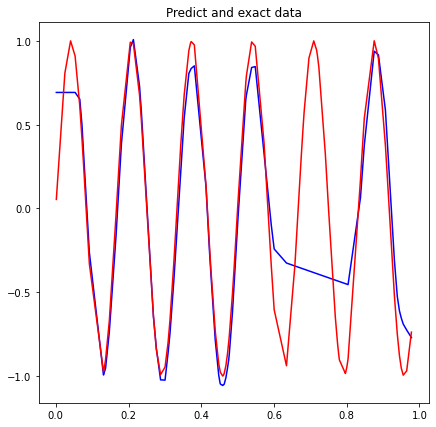

In [7]:
plt.figure(figsize = (7,7))
plt.plot(X_val,y_pred,'b')
plt.plot(X_val,y_val,'r')
plt.title('Predict and exact data')
plt.show()

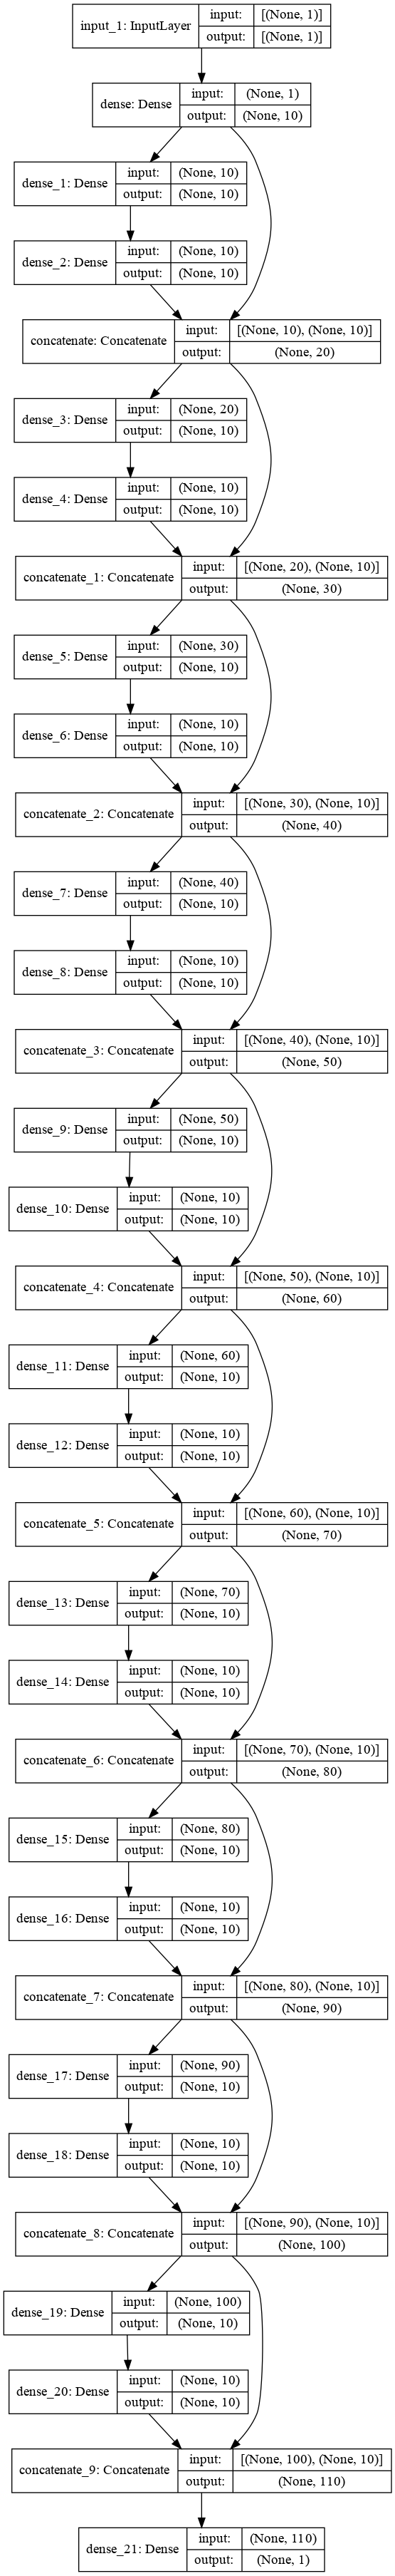

In [8]:
tf.keras.utils.plot_model(model,show_shapes = True)